In [ ]:
import matplotlib.pyplot as plt

# Données d'élévation et de bilan de masse
coordinates = [
    {'Balise': 'P20', 'X': 483717, 'Y': 5783821, 'Z': 1986},
    {'Balise': 'P30', 'X': 483510, 'Y': 5783581, 'Z': 2026},
    {'Balise': 'P40', 'X': 483208, 'Y': 5783245, 'Z': 2081}
]

# Extraction des données pertinentes
labels = [point['Balise'] for point in coordinates]
elevation_data = [point['Z'] for point in coordinates]  # Élévation en mètres
balance_data = [2.835, 3.105, 3.051]  # Bilan de masse en mètre d'équivalent en eau (mWE)

# Création du graphique amélioré
plt.figure(figsize=(14, 10))
plt.scatter(elevation_data, balance_data, color='dodgerblue', s=200, edgecolor='black', linewidth=1.5, alpha=0.9, marker='o')

# Ajout des titres et étiquettes en français avec amélioration du style
plt.xlabel('Élévation (m)', fontsize=18, fontweight='bold', labelpad=15)
plt.ylabel('Bilan de Masse (mWE)', fontsize=18, fontweight='bold', labelpad=15)
plt.title("Relation entre l'altitude et le bilan de masse des balises \n du glacier Athabasca (2023-2024)", fontsize=22, fontweight='bold', color='darkblue', pad=25)

# Ajout d'une grille améliorée
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.8, color='grey')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Ajout des étiquettes pour chaque point avec style amélioré
for i, label in enumerate(labels):
    plt.text(elevation_data[i] + 10, balance_data[i], label, fontsize=16, color='darkred', fontweight='bold',
             bbox=dict(facecolor='white', edgecolor='darkred', alpha=0.7, boxstyle='round,pad=0.5'))

# Ajout d'un fond pour améliorer l'apparence
plt.gca().set_facecolor('#f7f7f7')

# Affichage du graphique
plt.tight_layout()
plt.show()



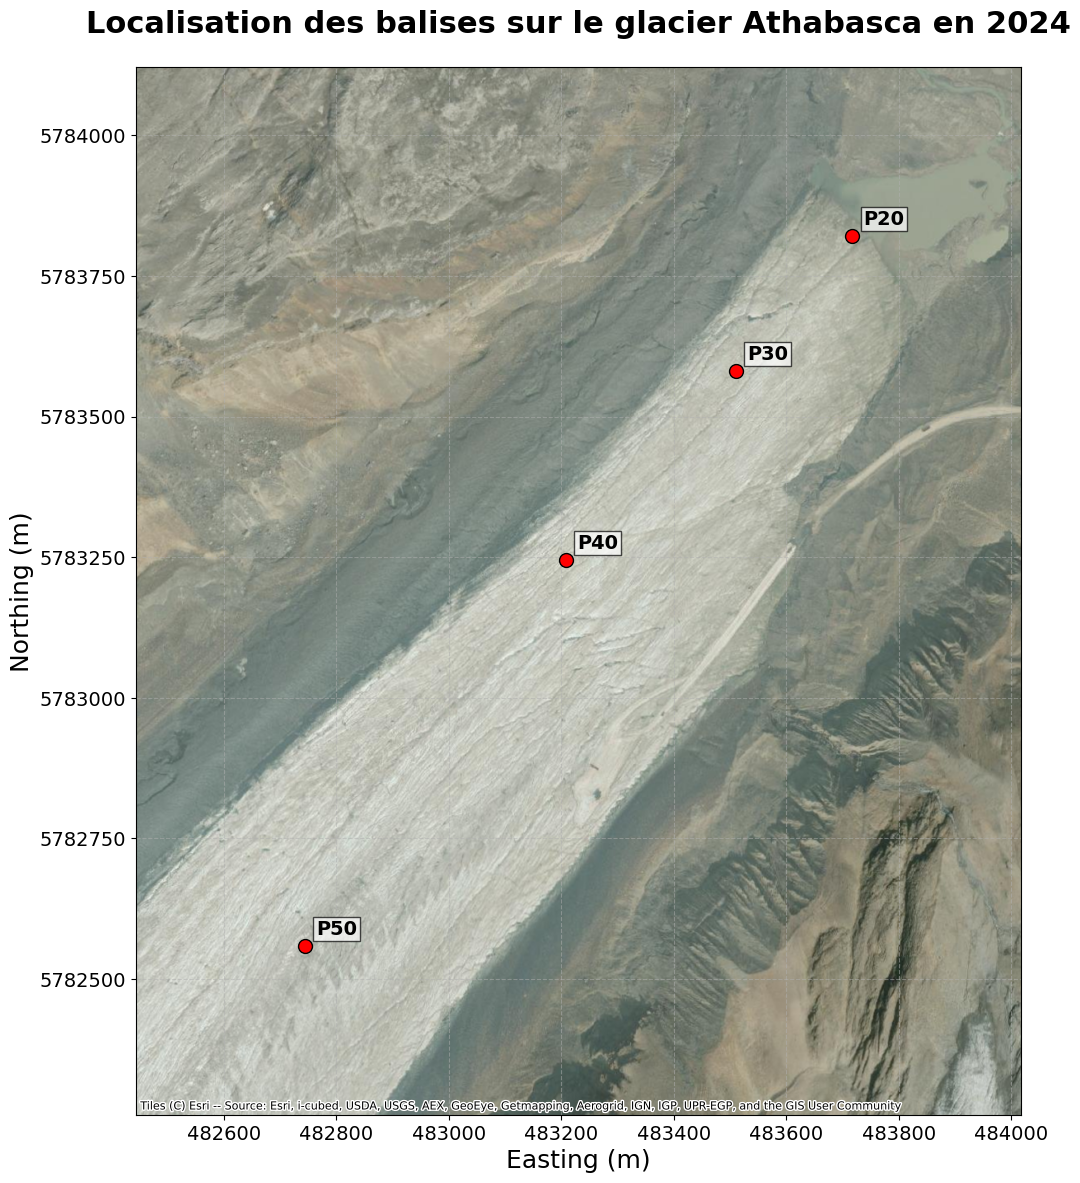

In [2]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
from matplotlib.ticker import ScalarFormatter

# Charger les données des balises à partir du fichier Excel
file_path = r"D:\UQTR\Automne 2024\Ouest\stakes_étudiants.xlsx"
data = pd.read_excel(file_path)

# Extraire les coordonnées des balises
coordinates = data.iloc[2:6, [0, 1, 2, 3]].copy()
coordinates.columns = ['Balise', 'X', 'Y', 'Z']

# Créer un GeoDataFrame pour les balises
gdf = gpd.GeoDataFrame(
    coordinates,
    geometry=gpd.points_from_xy(coordinates['X'], coordinates['Y']),
    crs="EPSG:26911"  # NAD83 / UTM zone 11N
)

# Créer la carte statique
fig, ax = plt.subplots(figsize=(12, 12))  # Taille totale de la figure

# Ajuster les limites de la carte pour dézoomer
buffer = 300  # Augmenter le tampon pour inclure plus de zone autour des balises
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx - buffer, maxx + buffer)
ax.set_ylim(miny - buffer, maxy + buffer)

# Ajouter le fond de carte en premier
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, crs=gdf.crs.to_string(), zoom=16)

# Tracer les balises par-dessus le fond de carte
gdf.plot(ax=ax, color='red', markersize=100, edgecolor='black', alpha=1, zorder=3)

# Ajouter des étiquettes pour chaque point
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Balise']):
    ax.text(
        x + 20, y + 20, label,
        fontsize=14,
        color='black',
        fontweight='bold',
        bbox=dict(facecolor='white', edgecolor='black', alpha=0.7, pad=2),  # Bordure noire autour de l'étiquette
        zorder=4
    )

# Ajouter le titre et améliorer l'apparence
ax.set_title(
    "Localisation des balises sur le glacier Athabasca en 2024",
    fontsize=22,
    pad=40,  # Ajuster l'espacement par rapport au sommet de l'axe (valeur plus petite pour rapprocher le titre)
    fontweight='bold',
    y=0.98  # Ajuster la position verticale du titre (valeur légèrement supérieure à 1 pour le déplacer un peu plus bas)
)
ax.set_xlabel("Easting (m)", fontsize=18)   # Changer l'étiquette de l'axe X en UTM
ax.set_ylabel("Northing (m)", fontsize=18)  # Changer l'étiquette de l'axe Y en UTM
plt.grid(True, linestyle='--', alpha=0.5)

# Ajuster les marges pour donner plus d'espace autour de la carte
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Ajuster le format des étiquettes des axes pour afficher des nombres entiers
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', useOffset=False, axis='both')

# Augmenter la taille de la police des étiquettes des axes
ax.tick_params(axis='both', which='major', labelsize=14)

# Réduire la taille de la carte dans le layout global
fig.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

# Afficher la carte avec une résolution de 300 DPI
plt.tight_layout()
plt.savefig("carte_glacier_athabasca.png", dpi=300)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Créer les données directement
data = {
    'Balise': ['P20', 'P30', 'P40', 'P50'],
    'Altitude (m)': [1986, 2026, 2081, 2149],
    'Bilan de masse (m eq. eau)': [2.835, 3.105, 3.051, 2.880]
}

df = pd.DataFrame(data)

# Tracer le bilan de masse en fonction de l'altitude
plt.figure(figsize=(10, 6))
plt.plot(df['Altitude (m)'], df['Bilan de masse (m eq. eau)'], marker='o', linestyle='-', color='b')
plt.xlabel('Altitude (m)')
plt.ylabel('Bilan de masse (m eq. eau)')
plt.title("Bilan de Masse du Glacier Athabasca en Fonction de l'Altitude")
plt.grid(True)

# Afficher le graphique
plt.show()


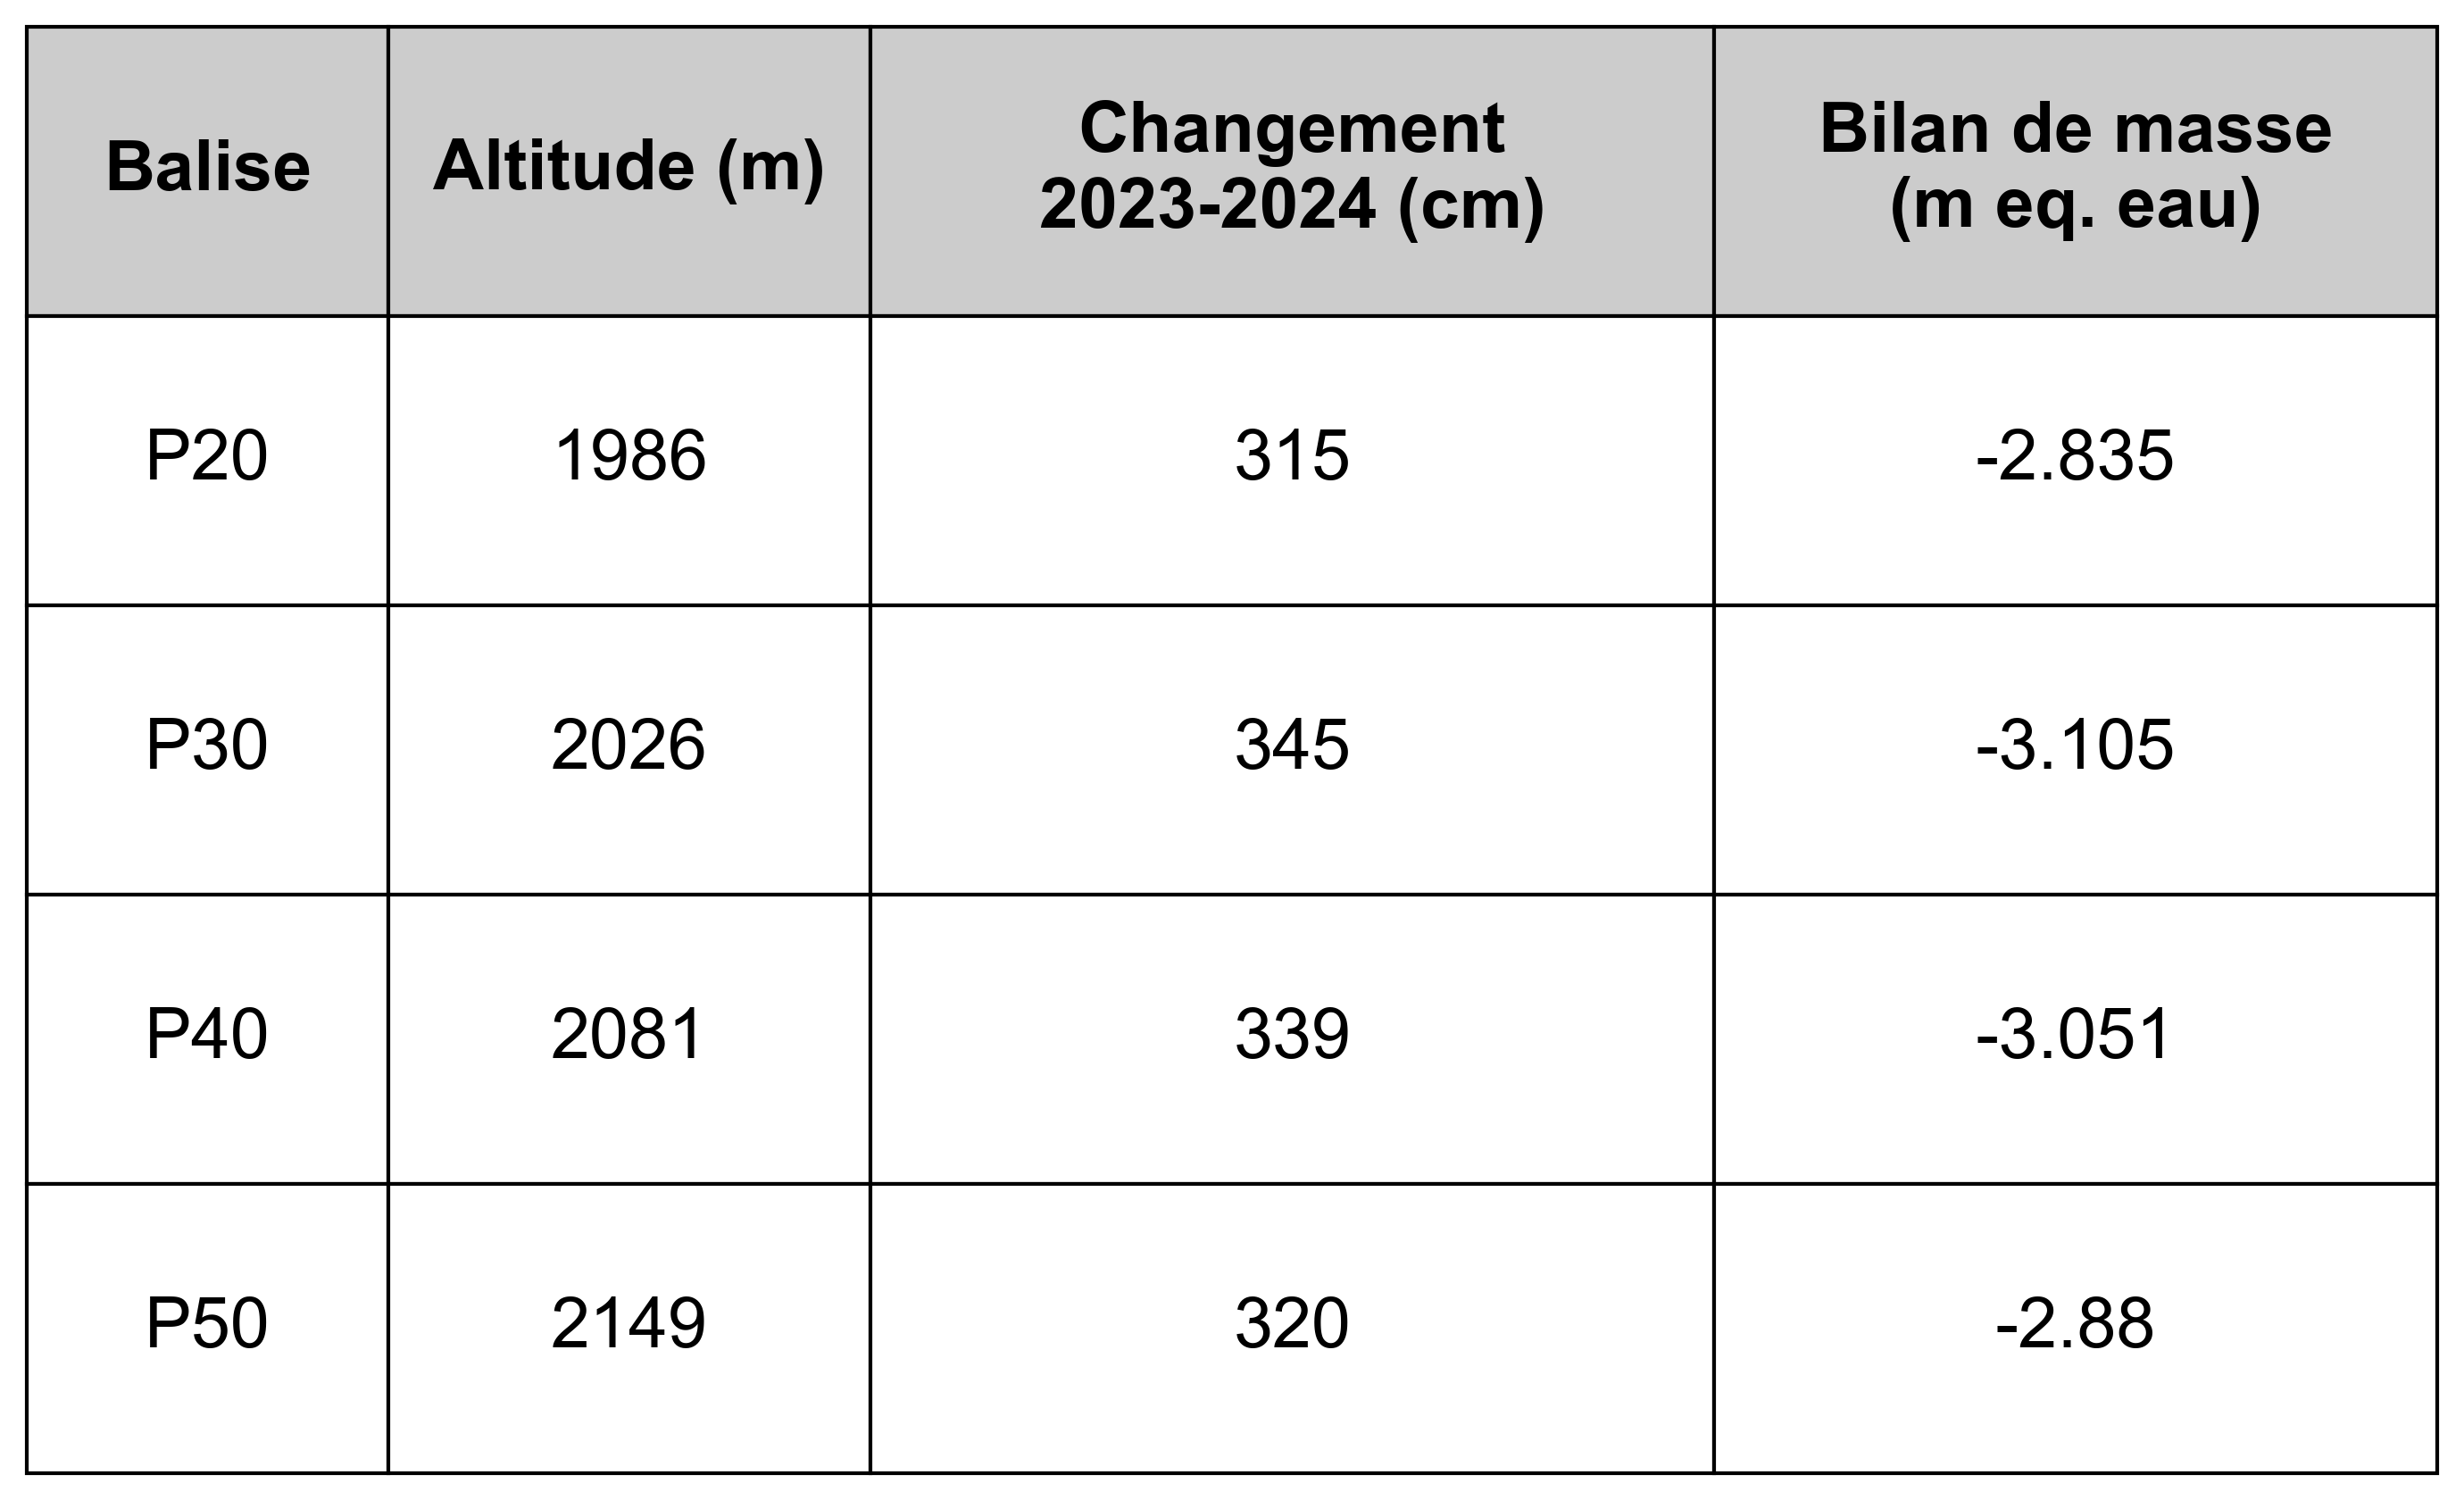

In [3]:
import pandas as pd
from matplotlib.table import Table
import matplotlib.pyplot as plt

# Create the data directly
data = {
    'Balise': ['P20', 'P30', 'P40', 'P50'],
    'Altitude (m)': [1986, 2026, 2081, 2149],
    'Changement 2023-2024 (cm)': [315, 345, 339, 320],
    'Bilan de masse (m eq. eau)': [-2.835, -3.105, -3.051, -2.880]
}
df = pd.DataFrame(data)

# Font parameters
font_size = 40  # Further increased font size
font_name = 'Arial'  # Optional: Specify a clear font

# Create a large figure to accommodate bigger text
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)  # Increased figsize
ax.axis('off')

# Prepare table data with headers
table_data = [
    ['Balise', 'Altitude (m)', 'Changement\n2023-2024 (cm)', 'Bilan de masse\n(m eq. eau)']
] + df.values.tolist()

# Create the table with more space
table = Table(ax, bbox=[0, 0, 1, 1])

# Define relative column widths
column_widths = [0.15, 0.2, 0.35, 0.3]

# Add cells to the table
for i, row in enumerate(table_data):
    for j, cell_value in enumerate(row):
        cell = table.add_cell(
            i, j, 
            width=column_widths[j],
            height=0.2,  # Adjust height as needed
            text=str(cell_value),
            loc='center',
            facecolor='white'
        )
        
        # Set font properties
        cell_text = cell.get_text()
        cell_text.set_fontsize(font_size)
        cell_text.set_fontname(font_name)
        
        # Styling for header row
        if i == 0:
            cell.set_facecolor('#cccccc')
            cell_text.set_weight('bold')
            cell_text.set_ha('center')
            cell_text.set_va('center')
            # Optional: Enable text wrapping if needed
            # cell_text.set_wrap(True)

# Add the table to the axes
ax.add_table(table)

# Adjust layout to fit the table
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Display the table
plt.show()
